In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/metadata/reports_metadata.csv")
df

,Country,Year,Report Length (Pages)
0,Latvia,1998,60
1,Latvia,1999,96
2,Latvia,2000,114
3,Latvia,2001,132
4,Latvia,2002,159
5,Lithuania,1998,54
6,Lithuania,1999,87
7,Lithuania,2000,113
8,Lithuania,2001,129
9,Lithuania,2002,159


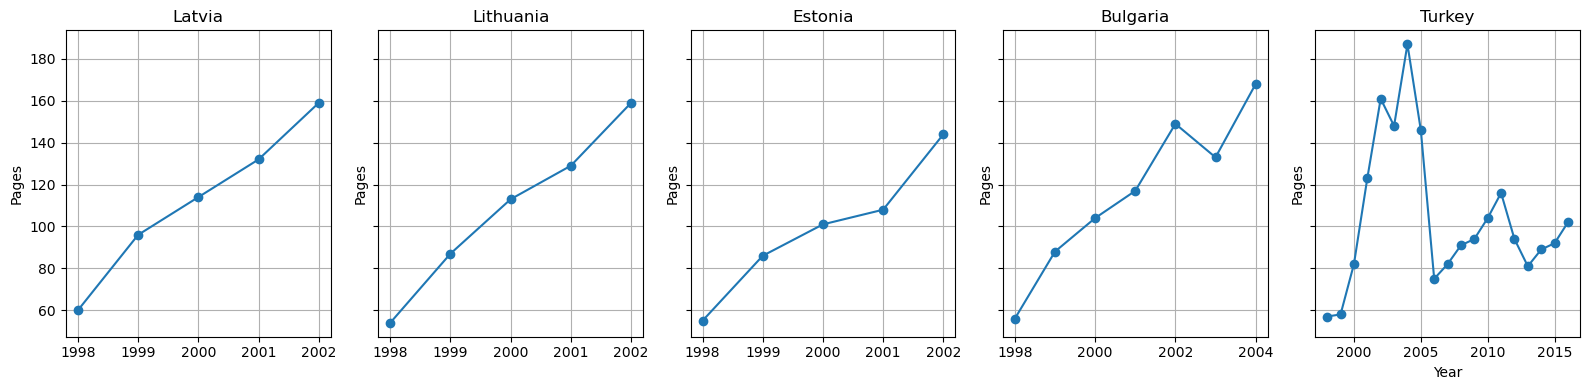

In [4]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
countries = df['Country'].unique()

fig, axes = plt.subplots(1, len(countries), figsize=(16, 4), sharey=True)

if len(countries) == 1:
    axes = [axes]

for ax, country in zip(axes, countries):
    subset = df[df['Country'] == country]
    ax.plot(subset['Year'], subset['Report Length (Pages)'], marker='o', linestyle='-')
    ax.set_title(country)
    ax.set_ylabel("Pages")
    ax.grid(True)

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


In [6]:
closures = pd.read_csv("../../data/metadata/chapters_metadata.csv")
latvia = closures[closures["Country"] == "Latvia"]

In [10]:
closures

,Country,Chapter,Provisional Closure
0,Latvia,Chapter 1: Free Movement of Goods,2001.0
1,Latvia,Chapter 2: Free Movement of Persons,2001.0
2,Latvia,Chapter 3: Freedom to Provide Services,2001.0
3,Latvia,Chapter 4: Free Movement of Capital,2001.0
4,Latvia,Chapter 5: Company Law,2001.0
...,...,...,...
140,Turkey,Chapter 25: Customs Union,NaN
141,Turkey,Chapter 26: External Relations,NaN
142,Turkey,Chapter 27: Common Foreign and Security Policy...,NaN
143,Turkey,Chapter 28: Financial Control,NaN


In [9]:
latvia["Provisional Closure"].describe()

count      29.000000
mean     2000.896552
std         0.724314
min      2000.000000
25%      2000.000000
50%      2001.000000
75%      2001.000000
max      2002.000000
Name: Provisional Closure, dtype: float64

In [18]:
closures['Closure_Year'] = pd.to_numeric(closures['Provisional Closure'])

start_dates = {
    'Estonia': 1997,    # Official candidacy
    'Latvia': 1998,
    'Lithuania': 1998,
    'Bulgaria': 1998
}


In [19]:
closures['Start_Year'] = closures['Country'].map(start_dates)

# Calculate time to closure
closures['Years_to_Closure'] = closures['Closure_Year'] - closures['Start_Year']

print("\nTime to closure statistics:")
print(closures['Years_to_Closure'].describe())

print("\nAny negative or very large values?")
print(closures[closures['Years_to_Closure'] < 0])  # Should be empty
print(closures[closures['Years_to_Closure'] > 15])  # Check if any suspiciously long


Time to closure statistics:
count    116.000000
mean       3.206897
std        1.123018
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Years_to_Closure, dtype: float64

Any negative or very large values?
Empty DataFrame
Columns: [Country, Chapter, Provisional Closure, Closure_Year, Start_Year, Years_to_Closure]
Index: []
Empty DataFrame
Columns: [Country, Chapter, Provisional Closure, Closure_Year, Start_Year, Years_to_Closure]
Index: []


In [21]:
# Summary by country
print("\n=== SUMMARY BY COUNTRY ===")
country_summary = closures.groupby('Country')['Years_to_Closure'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('N', 'count')
]).round(2)
print(country_summary)

# Summary by chapter
print("\n=== SUMMARY BY CHAPTER ===")
chapter_summary = closures.groupby('Chapter')['Years_to_Closure'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('N', 'count')
]).round(2).sort_values('Mean')
print(chapter_summary.head(10))  # Fastest closing chapters
print("...")
print(chapter_summary.tail(10))  # Slowest closing chapters


=== SUMMARY BY COUNTRY ===
           Mean  Median   Std  Min  Max   N
Country                                    
Bulgaria   3.62     4.0  1.37  2.0  6.0  29
Estonia    3.38     3.0  1.37  1.0  5.0  29
Latvia     2.90     3.0  0.72  2.0  4.0  29
Lithuania  2.93     3.0  0.70  2.0  4.0  29
Turkey      NaN     NaN   NaN  NaN  NaN   0

=== SUMMARY BY CHAPTER ===
                                                    Mean  Median   Std  N
Chapter                                                                  
Chapter 16: Small and Medium-sized Enterprises ...  1.75     2.0  0.50  4
Chapter 17: Science and Research                    1.75     2.0  0.50  4
Chapter 18: Education and Training                  1.75     2.0  0.50  4
Chapter 12: Statistics                              2.00     2.0  0.00  4
Chapter 23: Consumers and Health Protection         2.25     2.0  0.50  4
Chapter 27: Common Foreign and Security Policy ...  2.25     2.0  0.50  4
Chapter 26: External Relations              

In [23]:
# Which chapters closed fastest/slowest overall?
print("\n=== FASTEST CLOSING CHAPTERS (Average) ===")
fastest = chapter_summary.nsmallest(5, 'Mean')
print(fastest)

print("\n=== SLOWEST CLOSING CHAPTERS (Average) ===")
slowest = chapter_summary.nlargest(5, 'Mean')
print(slowest)

# Which specific observations are outliers?
print("\n=== LONGEST CLOSURE TIMES (Top 10 observations) ===")
longest = closures.nlargest(10, 'Years_to_Closure')[['Country', 'Chapter', 'Years_to_Closure']]
print(longest)

print("\n=== SHORTEST CLOSURE TIMES (Top 10 observations) ===")
shortest = closures.nsmallest(10, 'Years_to_Closure')[['Country', 'Chapter', 'Years_to_Closure']]
print(shortest)

# Variance decomposition: how much variation is within vs. between countries?
total_var = closures['Years_to_Closure'].var()
between_var = closures.groupby('Country')['Years_to_Closure'].mean().var()
within_var = total_var - between_var

print(f"\n=== VARIANCE DECOMPOSITION ===")
print(f"Total variance: {total_var:.2f}")
print(f"Between-country variance: {between_var:.2f} ({100*between_var/total_var:.1f}%)")
print(f"Within-country variance: {within_var:.2f} ({100*within_var/total_var:.1f}%)")


=== FASTEST CLOSING CHAPTERS (Average) ===
                                                    Mean  Median  Std  N
Chapter                                                                 
Chapter 16: Small and Medium-sized Enterprises ...  1.75     2.0  0.5  4
Chapter 17: Science and Research                    1.75     2.0  0.5  4
Chapter 18: Education and Training                  1.75     2.0  0.5  4
Chapter 12: Statistics                              2.00     2.0  0.0  4
Chapter 23: Consumers and Health Protection         2.25     2.0  0.5  4

=== SLOWEST CLOSING CHAPTERS (Average) ===
                                                    Mean  Median   Std  N
Chapter                                                                  
Chapter 21: Regional policy and coordination of...  4.75     4.5  0.96  4
Chapter 7: Agriculture                              4.75     4.5  0.96  4
Chapter 29: Finance and Budgetary Provisions        4.75     4.5  0.96  4
Chapter 24: Justice and Home Af